# Data Analysis Project: Bike Sharing
- **Nama:** Muhammad Aqil
- **Email:** muhammad.aqil6604@gmail.com
- **ID Dicoding:** muhammad_aqil

## Business Questions

- What are the conditions observed when bicycles are used on working days, holidays, and weekends?
- Is there an influence of seasons on bicycle rentals based on Casual and Registered customers?

## Setup Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

#### Load Tabel Day

In [ ]:
day_df = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


####Load Tabel Hour

In [ ]:
hr_df = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset/hour.csv')
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

####Data Type day_df

1. Checking on Data Type day_df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


There is 1 datatype didn't match with the coloumn, So need to be fixed with dteday -> datetime

2. Check Missing Values

In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


We could have a conclusion that day_df table didn't have any missing values

3. Check Data Duplication

In [ ]:
print("Data Duplicated: ", day_df.duplicated().sum())

Data Duplicated:  0


In day_df table there is 0 data duplicated, it means every data is unique

4. Checking for any anomalies in the statistical values

In [ ]:
day_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


We could see that there is no anomalies in the statistical values above



Data Type hr_df

1. Checking on Data Type hr_df

In [ ]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


There is 1 datatype didn't match with the coloumn, So need to be fixed with dteday -> datetime

2. Check Missing Values

In [ ]:
hr_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


We could have a conclusion that hr_df table didn't have any missing values

3. Check Data Duplication

In [ ]:
print("Data Duplicated: ", hr_df.duplicated().sum())

Data Duplicated:  0


In hr_df table there is 0 data duplicated, it means every data is unique

4. Checking for any anomalies in the statistical values

In [ ]:
hr_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


We could see that there is no anomalies in the statistical values above

### Cleaning Data

1. Deleting Irrelevant Table

Before we proceed to the next steps, we will first delete the 'hr' table. The reason is that it is not relevant to the business questions we have established, and in fact, the only difference between the 'hr' and 'day' tables is the 'hr' column; everything else is the same.

In [ ]:
del hr_df

2. Removing several columns that will not be used.

Based on the existing business questions, the columns to be dropped are:

instant: Because the record index does not provide any useful additional information.
windspeed: There are no business questions related to the effect of wind speed on the number of bike rentals.

In [ ]:
drop_col = ['instant', 'windspeed']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,1,1


3. Modifying some details about the columns.

Since the names of the columns above do not quite match my style, I will change them. I also prefer categorical data types, so I will convert some columns that were previously numeric. Additionally, some data types were not appropriate, and I will change those as well.

In [ ]:
# Changing Column Name
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,dateday,season,year,month,hr,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,1,1


In [ ]:
# Changing Number into Description
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [ ]:
# Converting Datatype into datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

day_df.head()

,dateday,season,year,month,hr,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,3,13,16
1,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,8,32,40
2,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,5,27,32
3,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,3,10,13
4,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0,1,1


In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       17379 non-null  datetime64[ns]
 1   season        17379 non-null  category      
 2   year          17379 non-null  category      
 3   month         17379 non-null  category      
 4   hr            17379 non-null  int64         
 5   holiday       17379 non-null  category      
 6   weekday       17379 non-null  category      
 7   workingday    17379 non-null  category      
 8   weather_cond  17379 non-null  category      
 9   temp          17379 non-null  float64       
 10  atemp         17379 non-null  float64       
 11  hum           17379 non-null  float64       
 12  casual        17379 non-null  int64         
 13  registered    17379 non-null  int64         
 14  count         17379 non-null  int64         
dtypes: category(7), datetime64[ns](1), f

## Exploratory Data Analysis (EDA)

### Explore Data day_df
####1. Bike Renter Grouping based on Month (both casual and registered)

In [ ]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-26-b05109ea9f0a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='month').agg({


count                        
        max min        mean     sum
month                              
Apr     822   1  187.260960  269094
Aug     941   1  238.097627  351194
Dec     759   1  142.303439  211036
Feb     610   1  112.865026  151352
Jan     559   1   94.424773  134933
Jul     913   1  231.819892  344948
Jun     900   1  240.515278  346342
Mar     957   1  155.410726  228920
May     873   1  222.907258  331686
Nov     729   1  177.335421  254831
Oct     963   1  222.158511  322352
Sep     977   1  240.773138  345991

Based on the results above, it can be concluded that the month with the highest average and the largest number is June, while the month with the lowest average and the smallest number is January.

2. Bike Renter Grouping based on weather conditions (both casual and registered)

In [ ]:
day_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-27-c87e0d584980>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weather_cond').agg({


count                         
                      max min        mean      sum
weather_cond                                      
Clear/Partly Cloudy   977   1  204.869272  2338173
Light Snow/Rain       891   1  111.579281   158331
Misty/Cloudy          957   1  175.165493   795952
Severe Weather        164  23   74.333333      223

Based on the results above, it can be concluded that bike renters tend to rent bicycles when the weather is clear or cloudy. Very few rentals occur when it is snowing, and there are none during extremely bad weather.

3. Bike Renter Grouping based on Holiday (both casual and registered)

In [ ]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-28-6767227fada1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='holiday').agg({


count                        
          max min       mean      sum
holiday                              
0         977   1  190.42858  3214244
1         712   1  156.87000    78435

Based on the results above, it can be concluded that bike renters prefer to rent bicycles on non-holiday days rather than on holidays.

4. Bike Renters Comparation on Weekdays and Weekends

In [ ]:
day_df.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

<ipython-input-29-7bfa45d53d30>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weekday').agg({


count                
          max min        mean
weekday                      
Fri       957   1  196.135907
Mon       968   1  183.744655
Sat       783   1  190.209793
Sun       776   1  177.468825
Thu       976   1  196.436665
Tue       970   1  191.238891
Wed       977   1  191.130505

Based on the results above, the order of the average number of renters from largest to smallest is: Friday (Fri), Thursday (Thu), Saturday (Sat), Wednesday (Wed), Tuesday (Tue), Monday (Mon), and Sunday (Sun)

5. Group bike renters (both casual and registered) based on working days

In [ ]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

<ipython-input-30-fb984321fedb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='workingday').agg({


count                
             max min        mean
workingday                      
0            783   1  181.405332
1            977   1  193.207754

Based on the results above, the highest number of bike rentals occurs on working days compared to non-working days. However, we can also see that the results are quite different, although not significantly.

6. Bike Renters Grouping based on Season (both casual and registered)

In [ ]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

<ipython-input-31-176def68a8e5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


casual  registered count                
             mean        mean   max min        mean
season                                             
Fall    50.287144  185.729093   977   1  236.016237
Spring  14.290901   96.823668   801   1  111.114569
Summer  46.160581  162.183488   957   1  208.344069
Winter  30.666824  168.202032   967   1  198.868856

Based on the analysis results above, both Casual and Registered bike renters prefer the fall season, as indicated by the average. In contrast, the least rentals occur in the spring season, with the lowest average.

7. Group temp, atemp and humidity based on season

In [ ]:
day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

<ipython-input-32-0b30bfab3067>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


temp                   atemp                    hum                
         max   min      mean     max     min      mean  max   min      mean
season                                                                     
Fall    1.00  0.38  0.706410  1.0000  0.2424  0.656004  1.0  0.16  0.633167
Spring  0.72  0.02  0.299147  0.6515  0.0000  0.298116  1.0  0.00  0.581348
Summer  0.94  0.16  0.544663  0.8788  0.1667  0.520547  1.0  0.16  0.627022
Winter  0.76  0.14  0.423138  0.6818  0.1515  0.415738  1.0  0.16  0.667124

Based on the analysis results above, several statements can be concluded as follows:

- The highest average temperature and atemp occur in the fall season, followed by summer, winter, and spring.
- The highest average humidity occurs in the winter season, followed by fall, summer, and spring.

8. Relationship between casual renters, registered centers, and count

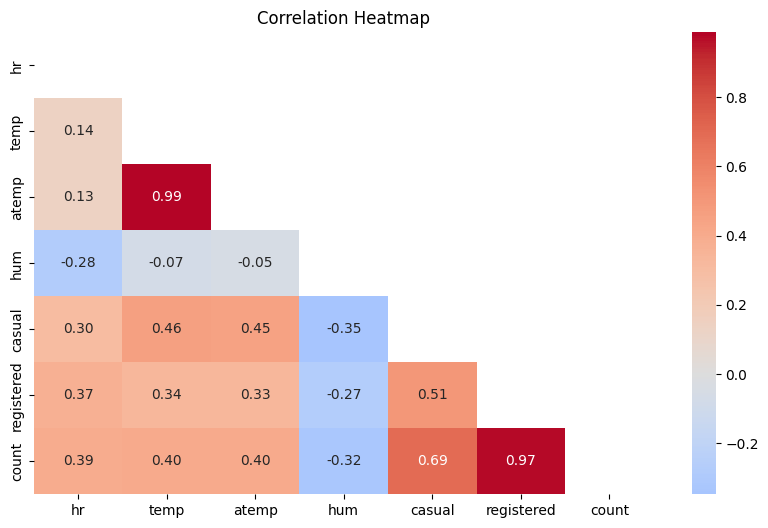

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Based on the analysis results above, the following statements can be made:

- atemp and temp are highly correlated (0.99).
- hum has a weak correlation with temp and atemp (0.13 and 0.14).
- casual is moderately correlated with temp and atemp (0.54) and slightly negatively correlated with hum (-0.08).
- registered exhibits a similar pattern to casual and has a moderate correlation with casual (0.40).
- count is strongly correlated with temp, atemp, casual, and registered (0.63, 0.63, 0.67, and 0.95), and slightly negatively correlated with hum (-0.10).

## Visualization & Explanatory Analysis

### Question 1: What are the conditions observed when bicycles are used on working days, holidays, and weekends?

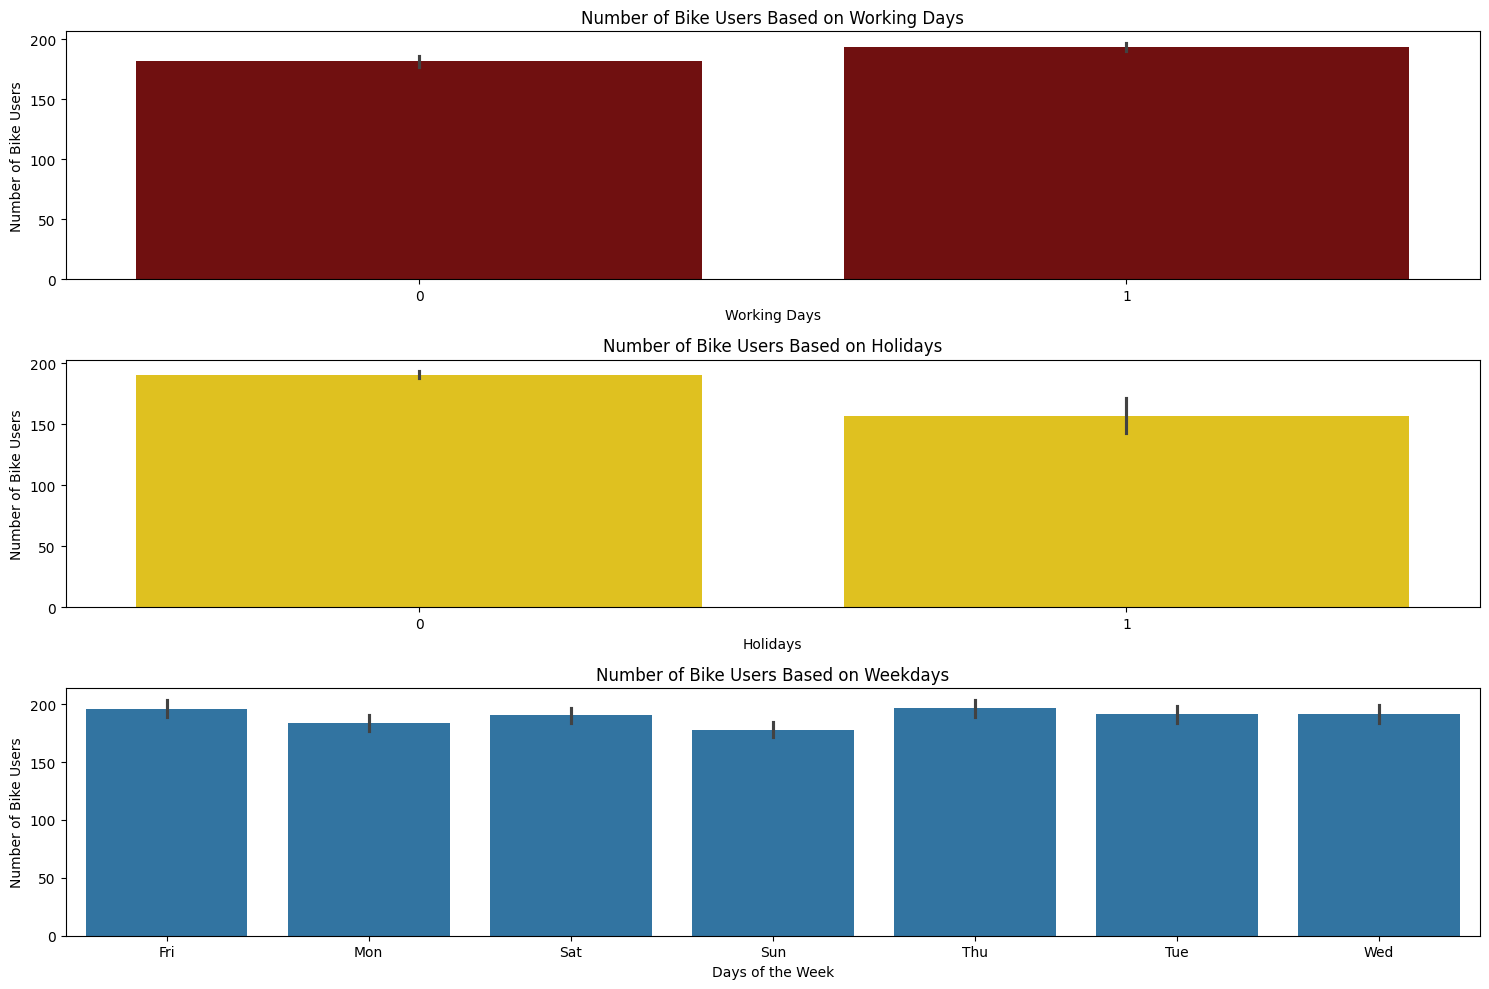

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# Based on working day
sns.barplot(
    x='workingday',
    y='count',
    data=day_df,
    ax=axes[0],
    color='Maroon'
)
axes[0].set_title('Number of Bike Users Based on Working Days')
axes[0].set_xlabel('Working Days')
axes[0].set_ylabel('Number of Bike Users')

# Based on holiday
sns.barplot(
    x='holiday',
    y='count',
    data=day_df,
    ax=axes[1],
    color='gold'
)
axes[1].set_title('Number of Bike Users Based on Holidays')
axes[1].set_xlabel('Holidays')
axes[1].set_ylabel('Number of Bike Users')

# Based on weekday
sns.barplot(
    x='weekday',
    y='count',
    data=day_df,
    ax=axes[2],
)
axes[2].set_title('Number of Bike Users Based on Weekdays')
axes[2].set_xlabel('Days of the Week')
axes[2].set_ylabel('Number of Bike Users')

plt.tight_layout()
plt.show()

### Question 2: Is there an influence of seasons on bicycle rentals based on Casual and Registered customers?

<ipython-input-48-303e01eacd76>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()


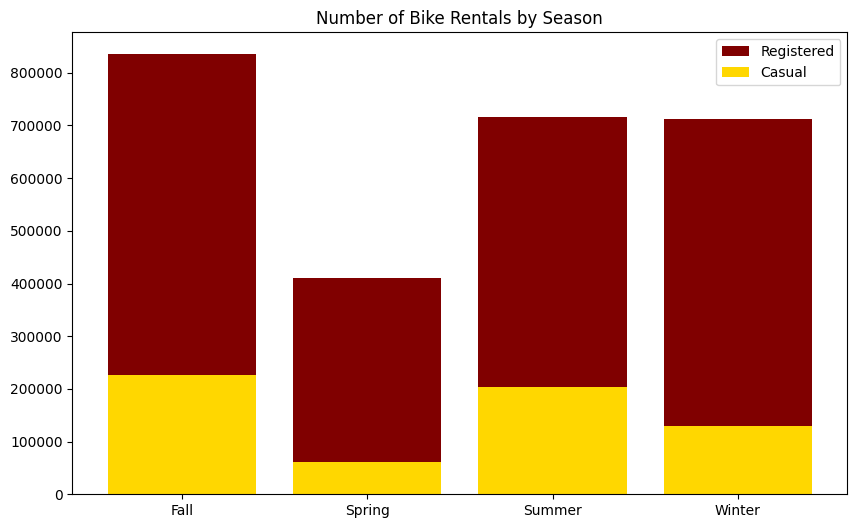

In [ ]:
# Grouping data by season and calculating the total registered and casual usage
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Creating the bar plot
plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='maroon'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='gold'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Number of Bike Rentals by Season')
plt.legend()
plt.show()

## Conclusion

- Conclution from Question 1 : The conditions displayed in this visualization are divided into three parts. For the number of bike users based on working days, working days outperform non-working days, although the difference is not very significant; there is still a clear distinction, with both being above 4000 users. Moving on to holidays, non-holidays win with a significant difference compared to holidays. This may indicate that users prefer to rent bikes on regular days. Lastly, based on weekdays, Friday ranks first with a mean of 4690.29, while Sunday ranks last with a mean of 4228.83.

- Conclution from Question 2 : Pada visualisasi terakhir, ternyata hasil yang didapatkan cukup mengejutkan dimana musim dingin (Winter) tidak menjadi yang terakhir, melainkan yang terakhir adalah musin semi (Spring). Hal ini bisa diakibatkan oleh banyak faktor seperti kondisi cuaca, temperatur udara, hari kerja, hari libur, dan lain-lain. Sedangkan urutan pertamanya ditempati oleh musim gugur (Fall) yang mampu meraih penyewaan sepeda sebanyak lebih dari 800000.